# Spam Classification

In [1]:
# Let's import our weapons 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [52]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
# Let's read our data

text=pd.read_csv(r"C:\Users\Daya\Desktop\ML  Material\NLP_Udemy\Codes\Spam Text Classification\spam.tsv",sep='\t')

In [3]:
# How our data looks like ?
text.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


##### Let's understand what each columns says
##### 1) Label  & Message , our In/dependent features :)
##### 2) Length : Length of the message 
##### 3) Punt : No of punctuations in our message 

### EDA 

In [35]:
# Shape of the data 

text.shape

(5572, 4)

In [39]:
# are there any duplicates ?

print(len(text[text.duplicated()==True]))

403


### OMG , we have to remove these duplicated entries to avoid overfitting 

In [40]:
text=text[text.duplicated()==False]

In [41]:
print(text.shape)
print(len(text[text.duplicated()==True]))

(5169, 4)
0


<AxesSubplot:xlabel='length', ylabel='Count'>

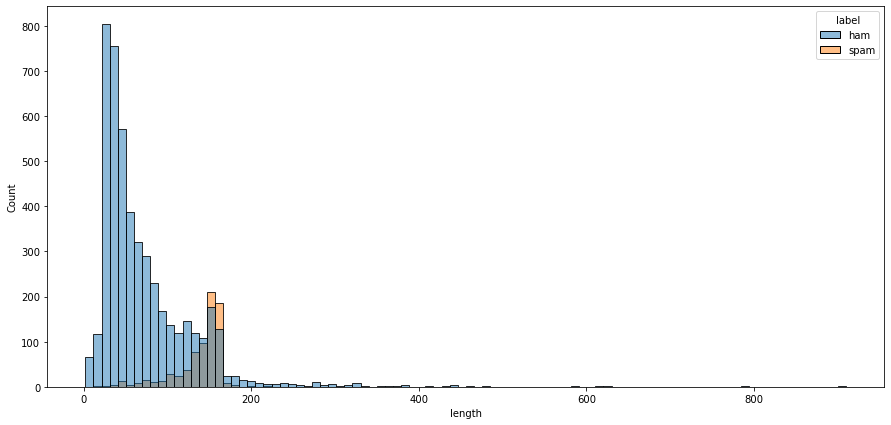

In [29]:
# Message Length Vs Output 

plt.figure(figsize=(15,7))
sns.histplot(data=text,x='length',hue='label')

##### Spam messages are having more length than  Ham messages 

<AxesSubplot:xlabel='punct', ylabel='Count'>

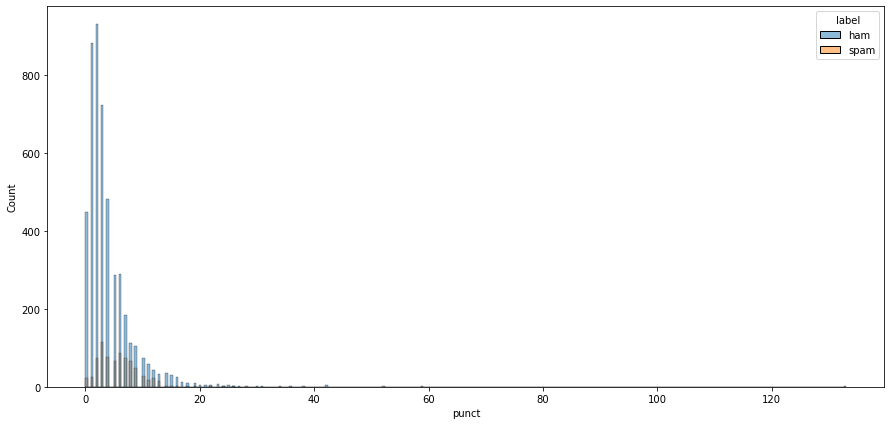

In [31]:
# Punctuation VS Output 
plt.figure(figsize=(15,7))
sns.histplot(data=text,x='punct',hue='label')

##### No much relation found here 

##### Is our data is imabalanced ?

<AxesSubplot:xlabel='label', ylabel='count'>

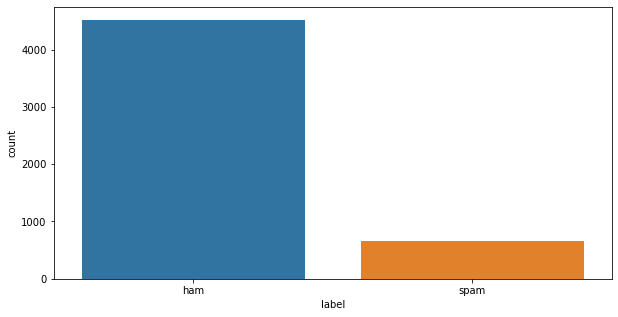

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=text,x='label')

##### It doen't look good, if we train our model on this for sure our model is biased towards Ham messages, to solve this we have two methods (as of now) 
##### 1) Make Ham and Spam messages count equal 
##### 2) Train different models and take mode of the output
##### We are going with the first one

In [48]:
spam=text[text['label']=='spam']
ham=text[text['label']=='ham'].sample(len(spam))

text=ham.append(spam)

text=text.reset_index(drop=True)

<AxesSubplot:xlabel='label', ylabel='count'>

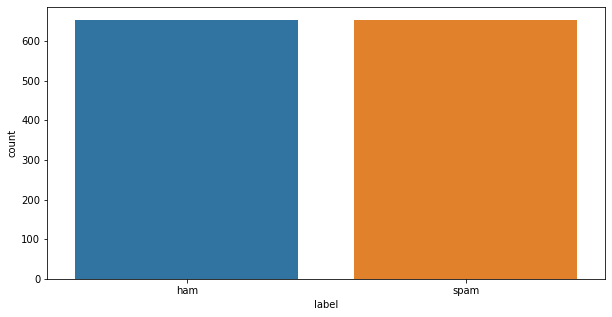

In [51]:
# Lets plot it now

plt.figure(figsize=(10,5))
sns.countplot(data=text,x='label')

#### As machine doesn't understand text, we need to convert text into numerical form, for doing this we have hell lot of ways but we will consider TF-IDF

##### TF-IDF :  Term Frequency * Inverse Document Frequency 
##### The main idea behind this is, if a word W appears in the document A for many times and doesn't occur much in other documents in the corupus then the word ' W ' must be of great importance.
##### Let's take an example to understand this, Assume a scenario where you are daily commuting from one bus stop to another bus stop and if all the buses take you to destination stop then you dont need to remember the bus numbers where as if only one bus travel to destination stop then you will remember that bus number, thats what TF-IDF do 


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# Lets create an object of the model 

tfidf=TfidfVectorizer()

In [56]:
# Let's fit and transform our data 

x=tfidf.fit_transform(text['message'])

In [57]:
# Let's look at the shape of transformed data 

x.shape

# Point to consider, output TD-IDF is a sparse matrix

(1306, 4314)

In [62]:
# Our text data is converted into Numeric, we have to split it into train and test

X_train,X_test,y_train,y_test=train_test_split(x,text['label'],test_size=0.2,random_state=40,stratify=text['label'])

In [63]:
# Let's load our models 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [64]:
# Random Forest

clf=RandomForestClassifier(n_estimators=100,n_jobs=-1,oob_score=True)

# Here we are training model without any hyperparameter tuning

In [65]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True)

In [66]:
y_pred = clf.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred)

array([[129,   2],
       [ 14, 117]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       131
        spam       0.98      0.89      0.94       131

    accuracy                           0.94       262
   macro avg       0.94      0.94      0.94       262
weighted avg       0.94      0.94      0.94       262



# SVM 

In [70]:
clf = SVC(C = 1000, gamma = 'auto')

# Here c indicates flexibility 

In [71]:
clf.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

In [72]:
y_pred = clf.predict(X_test)

In [73]:
confusion_matrix(y_test, y_pred)

array([[131,   0],
       [  9, 122]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       131
        spam       1.00      0.93      0.96       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



##### Didn't expect this, SVM is performing better than RandomForest but surely if we do hyper parameter tuning then RF will do better than this 

## Note : The purpose of this notebook is to show how we can make a spam classifier with simple models 